### Instalando librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import keras

In [2]:
tf.__version__

'2.2.0'

### Lectura de datos csv

In [3]:
train_df=pd.read_csv('../data/mitbih_train.csv',header=None)
test_df=pd.read_csv('../data/mitbih_test.csv',header=None)

### Exploracion de los datos

0    18118
4     1608
2     1448
1      556
3      162
Name: 187, dtype: int64


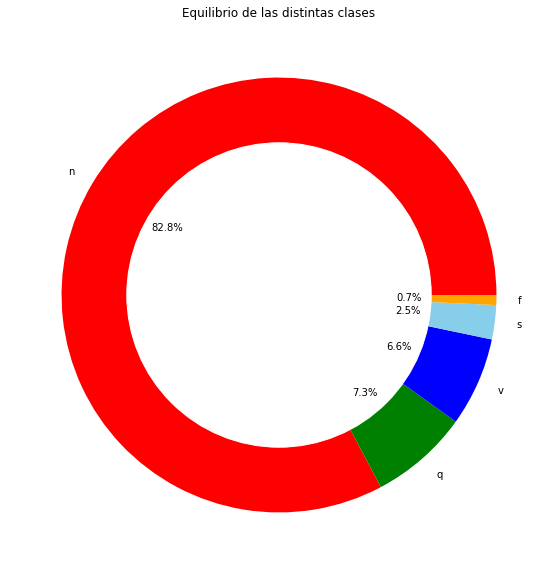

In [4]:
#Test set
test_df[187]=test_df[187].astype(int)
equilibre=test_df[187].value_counts()
print(equilibre)

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Equilibrio de las distintas clases')
plt.show()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


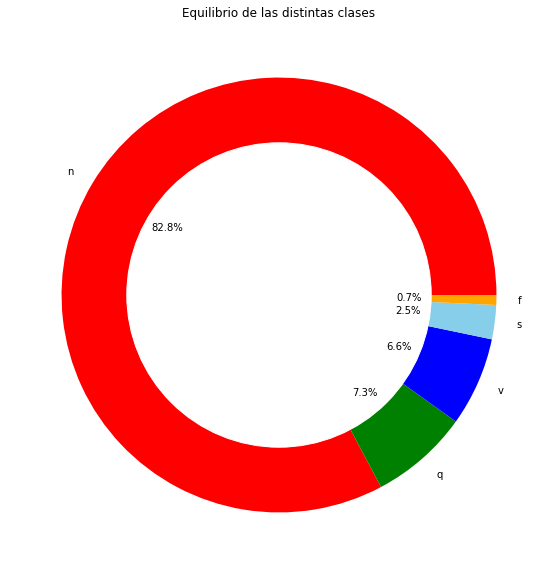

In [5]:
#Train set
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Equilibrio de las distintas clases')
plt.show()

Esto indica que las clases se encuentran desequilibradas. El hecho de que estas esten en equilibrio brinda mucha ayuda al modelo, pues es capaz de aprender mejor las caracteristicas de cada una y diferenciarlas.

In [6]:
from sklearn.utils import resample

df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


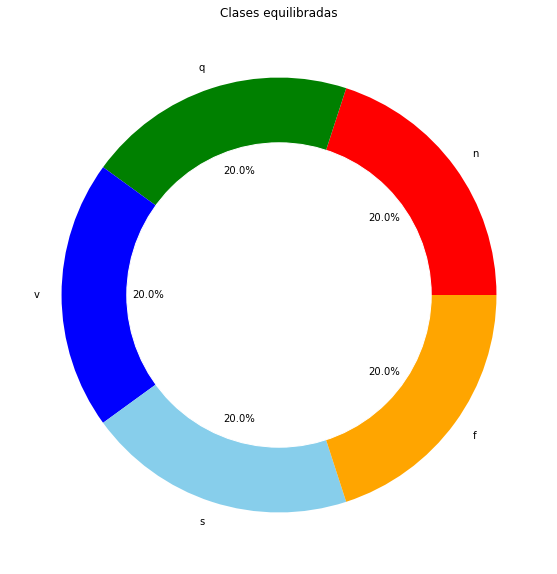

In [7]:
equilibre=train_df[187].value_counts()
print(equilibre)

plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Clases equilibradas')
plt.show()

### Visualizando los datos

In [8]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [9]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
8477,0.912602,0.969512,0.506098,0.050813,0.010163,0.073171,0.075203,0.056911,0.052846,0.065041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73582,0.724551,0.383234,0.239521,0.155689,0.137725,0.089820,0.089820,0.083832,0.119760,0.083832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78554,0.016925,0.000000,0.026798,0.124118,0.188999,0.238364,0.290550,0.324401,0.389281,0.506347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81011,0.844021,1.000000,0.641248,0.305026,0.181976,0.185442,0.157712,0.152513,0.140381,0.157712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
84163,1.000000,0.537849,0.513944,0.553785,0.581673,0.589641,0.581673,0.509960,0.410359,0.278884,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


### Graficas de latidos

In [10]:
def plot_hist(class_number,size,min_):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)

    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    return plt

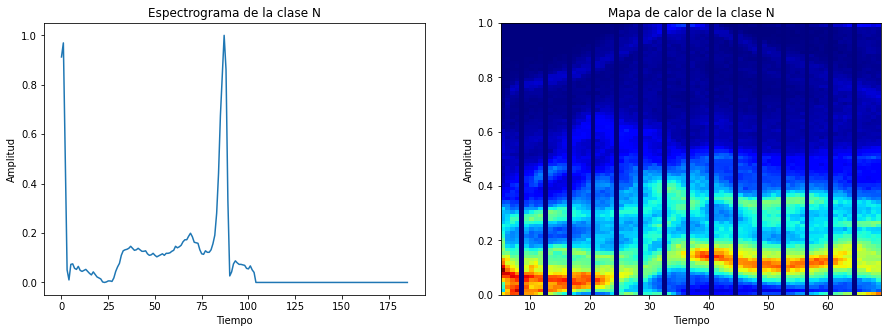

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
    
axs[0].plot(c.iloc[0,:186])
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Espectrograma de la clase N')
axs[1].plot(plot_hist(0,70,5).plot())
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Mapa de calor de la clase N')

plt.show()

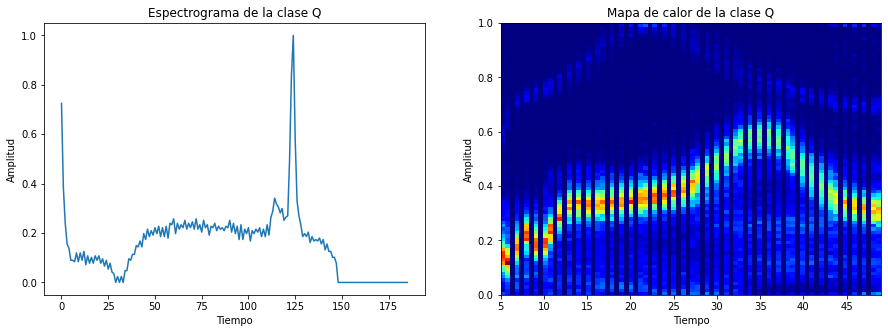

In [18]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(c.iloc[1,:186])
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Espectrograma de la clase Q')
axs[1].plot(plot_hist(1,50,5).plot())
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Mapa de calor de la clase Q')

plt.show()

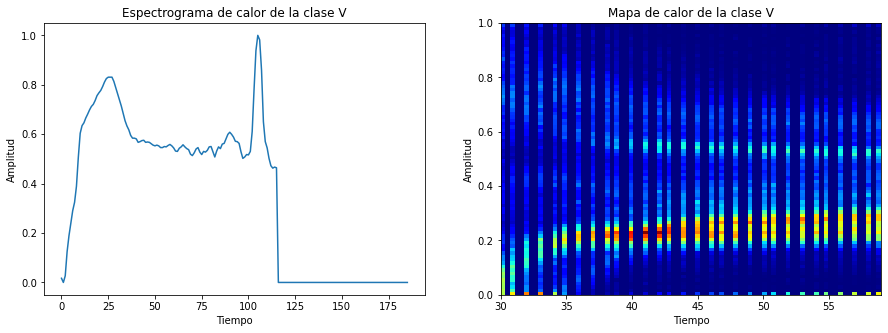

In [19]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(c.iloc[2,:186])
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Espectrograma de calor de la clase V')
axs[1].plot(plot_hist(2,60,30).plot())
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Mapa de calor de la clase V')

plt.show()

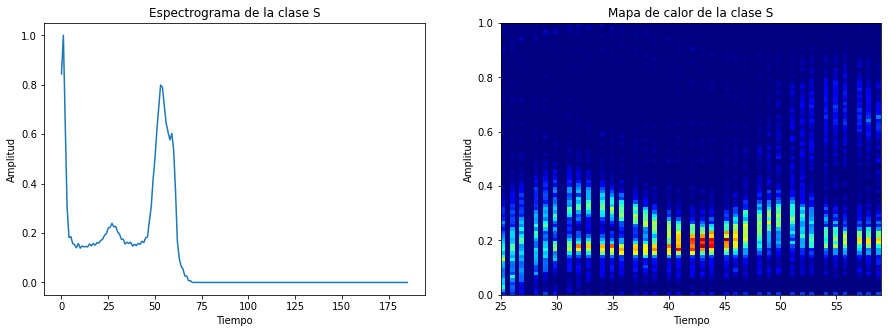

In [20]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(c.iloc[3,:186])
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Espectrograma de la clase S')
axs[1].plot(plot_hist(3,60,25).plot())
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Mapa de calor de la clase S')

plt.show()

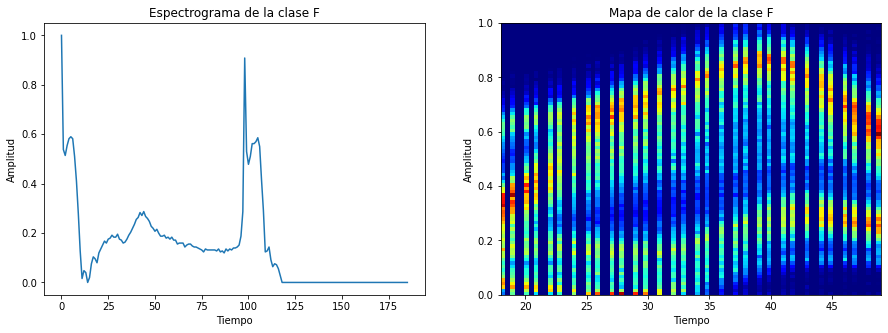

In [21]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(c.iloc[4,:186])
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Espectrograma de la clase F')
axs[1].plot(plot_hist(4,50,18).plot())
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Mapa de calor de la clase F')

plt.show()

### Agregando ruido
---
Esto sirve para generalizar mejor el modelo

In [22]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

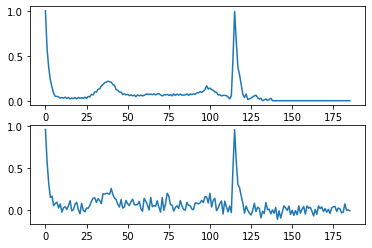

In [23]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()